In [1]:
# download the dataset
import requests

r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale''')

In [2]:
# load the dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

X, y = load_svmlight_file(f=BytesIO(r.content), n_features=13)
X = X.toarray()

In [3]:
import numpy

# preprocess
n_samples, n_features = X.shape
X = numpy.column_stack((X, numpy.ones((n_samples, 1))))
y = y.reshape((-1, 1))

In [4]:
# devide the dataset into traning set and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [5]:
def rmse(predict, y):
    return numpy.mean(numpy.sqrt((predict-y)**2))

In [6]:
learning_rate = 0.003
max_epoch = 200

losses_train = []
losses_val = []
rmse_val = []

In [7]:
loss_zeros = []
loss_random = []
loss_normal = []

In [16]:
# select different initializing method
#w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
#w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
w = numpy.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [17]:
for epoch in range(max_epoch):
    diff = numpy.dot(X_train, w) - y_train
    randind = numpy.random.randint(0,X_train.shape[0]-1)
    
    G = -numpy.dot(X_train[randind].T.reshape(-1,1), y_train[randind].reshape(-1,1))   # calculate the gradient
    
    G += numpy.dot(X_train[randind].T.reshape(-1,1),(X_train[randind].reshape(1,-1))).dot(w)
    G = -G
    w += learning_rate * G  # update the parameters

    Y_predict = numpy.dot(X_train[randind], w)  # predict under the train set
    loss_train = numpy.average(numpy.abs(Y_predict - y_train[randind]))  # calculate the absolute differences
    losses_train.append(loss_train)
    

    Y_predict = numpy.dot(X_val, w)  # predict under the validation set
    rmse_val.append(rmse(Y_predict, y_val))
    loss_val = numpy.average(numpy.abs(Y_predict - y_val))  # calculate the absolute differences
    losses_val.append(loss_val)
    #loss_zeros.append(loss_val)
    #loss_random.append(loss_val)
    loss_normal.append(loss_val)
    

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text yticklabel objects>)

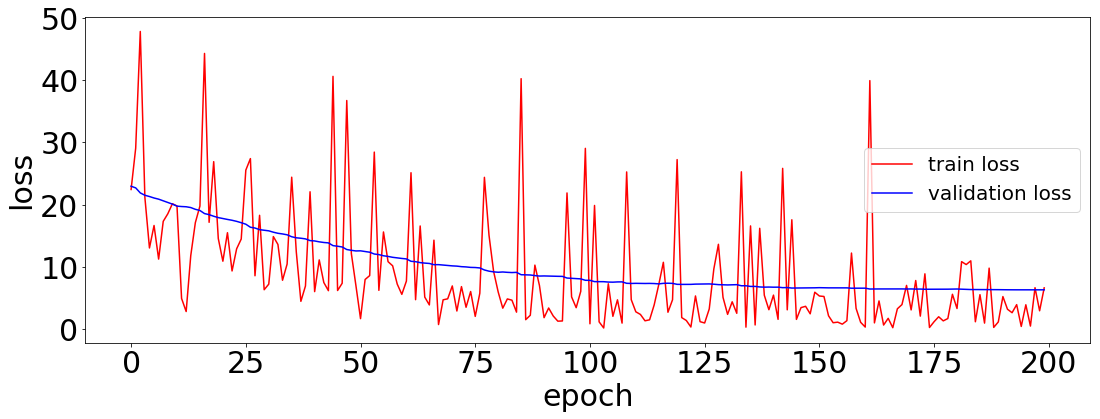

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch", fontsize=30)
plt.ylabel("loss", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)


(array([ 5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 9 Text yticklabel objects>)

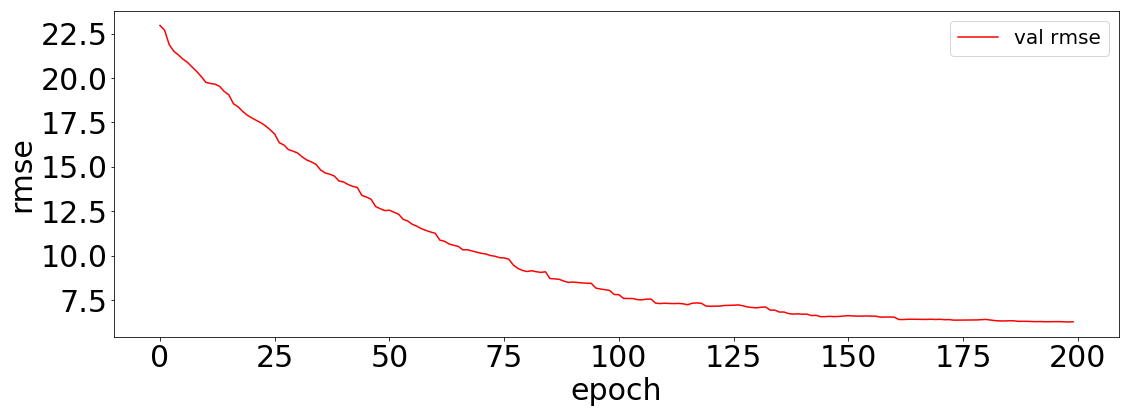

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(rmse_val, "-", color="r", label="val rmse")
plt.xlabel("epoch", fontsize=30)
plt.ylabel("rmse", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

(array([ 5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5]),
 <a list of 10 Text yticklabel objects>)

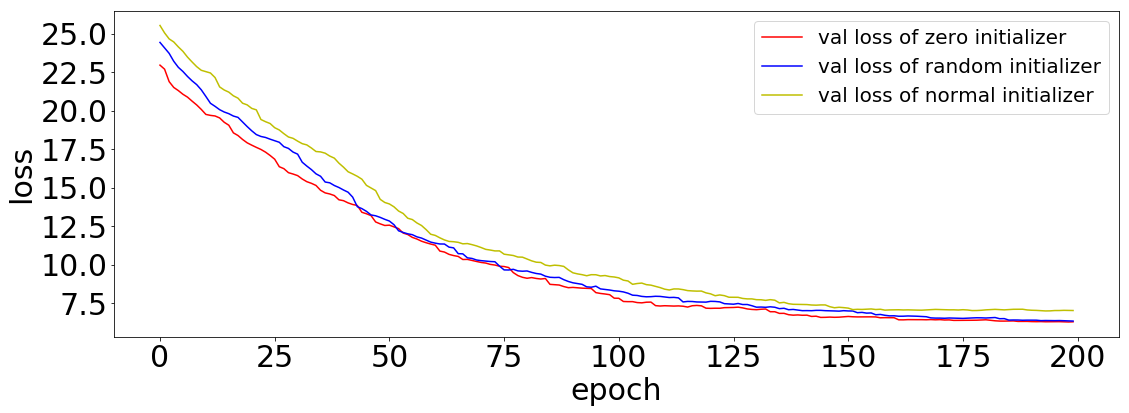

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(loss_zeros, "-", color="r", label="val loss of zero initializer")
plt.plot(loss_random, "-", color="b", label="val loss of random initializer")
plt.plot(loss_normal, "-", color="y", label="val loss of normal initializer")
plt.xlabel("epoch", fontsize=30)
plt.ylabel("loss", fontsize=30)
plt.legend(fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

In [19]:
print(numpy.mean(loss_zeros))
print(numpy.mean(loss_random))
print(numpy.mean(loss_normal))

10.123379601292351
10.552536297359392
11.341512841982428
